In [301]:
#libarary used in titanic dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [302]:
sns.get_dataset_names() #datasets names present in seaborn lib


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [303]:
df=sns.load_dataset('titanic')  #load titanic dataset from sns lib
df.head(20)                     #dataset contain too many null values and categorical values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [304]:
df.columns     #give column names

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [305]:
df.dtypes       #give column datatype
                #there are various types of string or categorical data present in dataset like sex,embarked,class,who...


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [306]:
df.isnull().sum()   #null values present in dataset
                    # there are four columns that contain null values age,embarked,deck,embark_town
                    # such null values affects the tranning of model and results in false prediction.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [307]:
#filling the null values using mean,median,mode
df['age']=df['age'].fillna((df['age'].median()))

df['deck']=df.replace(np.NaN,df['deck'].mode())


In [308]:
df['embark_town']=df.replace(np.NaN,df['embark_town'].mode())

In [309]:
df['embarked']=df.replace(np.NaN,df['embarked'].mode())


In [310]:
df.isnull().sum()    # no null values present in dataset


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [311]:
df.describe() # showing that age,fare column contain outlier

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [312]:
df.shape #891 rows present and 15 columns present

(891, 15)

In [313]:
df['survived'].value_counts()  #lets find total count of survivors      
                                #0-> died ,1-> survived



0    549
1    342
Name: survived, dtype: int64

In [314]:
df['pclass'].value_counts()     #visitors present on titanic according to pclass 


3    491
1    216
2    184
Name: pclass, dtype: int64

In [315]:
df["sex"].value_counts()        #visitors present on titanic according to sex


male      577
female    314
Name: sex, dtype: int64

In [316]:
df["sibsp"].value_counts()      # visitors present on titanic according to siblings


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [317]:
df["parch"].value_counts()      #visitors present on titanic according to parch


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [318]:
df["who"].value_counts()        # total number of visitors present on titanic according to male,female,child 


man      537
woman    271
child     83
Name: who, dtype: int64

In [319]:
df["embarked"].value_counts()   #visitors present on titanic according to embarked column


0    549
1    342
Name: embarked, dtype: int64

In [320]:
df["embark_town"].value_counts()   #visitors present on titanic according to embark_town


0    549
1    342
Name: embark_town, dtype: int64

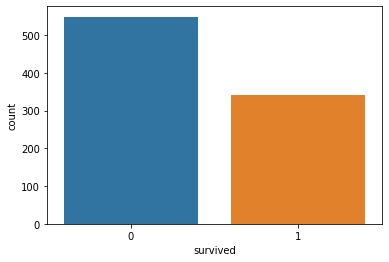

In [321]:
sns.countplot(df['survived'])   #showcase the count of survivours..
# 0-who not survived     1-who survived


In [322]:
#looking at survival rate by sex
df.groupby("sex")[['survived']].mean()
#74% female survived which is more than male

,survived
sex,
female,0.742038
male,0.188908


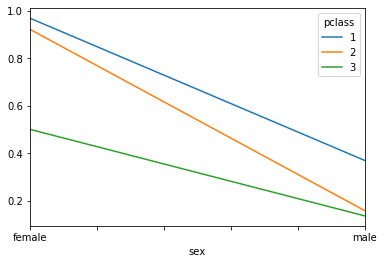

In [323]:
#look at survival rate by class and sex
df.pivot_table('survived',index = 'sex',columns = "pclass").plot()


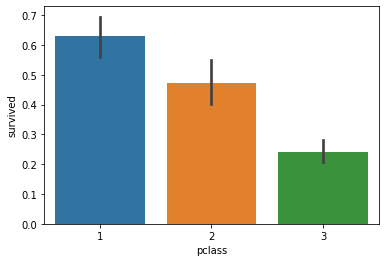

In [324]:
#plot the survival rate of each class
sns.barplot(x = 'pclass',y = 'survived',data = df)
#This graph gives a brief information stating that there were higher chances of survival of passangers with first class Tickets
#and then following the second class and at last 3 class with vcery few chances of survival.




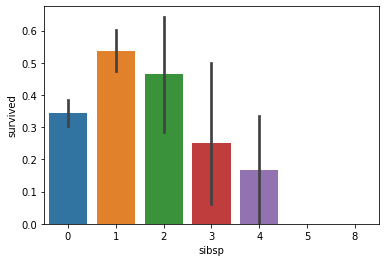

In [325]:
#look at survival rate by siblings

sns.barplot(x="sibsp",y="survived", data=df) 


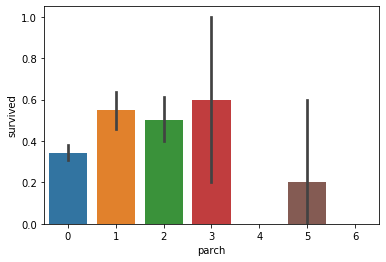

In [326]:
#look at survival rate by parch

sns.barplot(x="parch",y="survived", data=df) 


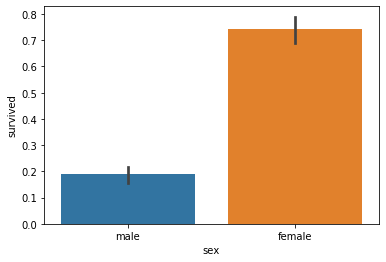

In [327]:
#look at survival rate by sex

sns.barplot(x="sex",y="survived", data=df) 


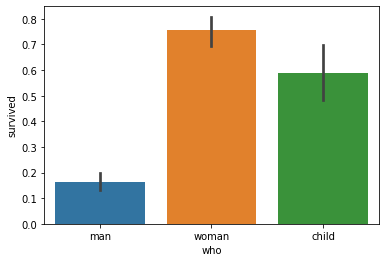

In [328]:
#look at survival rate by who

sns.barplot(x="who",y="survived", data=df) 


In [329]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)
#higher chance of survival is  pclass-1

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [330]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)
#higher chance of survival is female

,sex,survived
0,female,0.742038
1,male,0.188908


In [331]:
df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)
# higher chance of survival sibsp 1

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [332]:
df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)
#higher chance of survival parch 3

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [333]:
df.groupby(['sex','survived'])['survived'].count()
#female suvived 233 while male survived 109 only

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

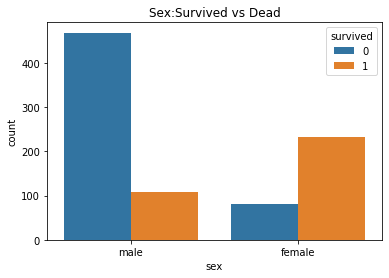

In [334]:
sns.countplot('sex',hue='survived',data=df)
plt.title('Sex:Survived vs Dead')
plt.show()


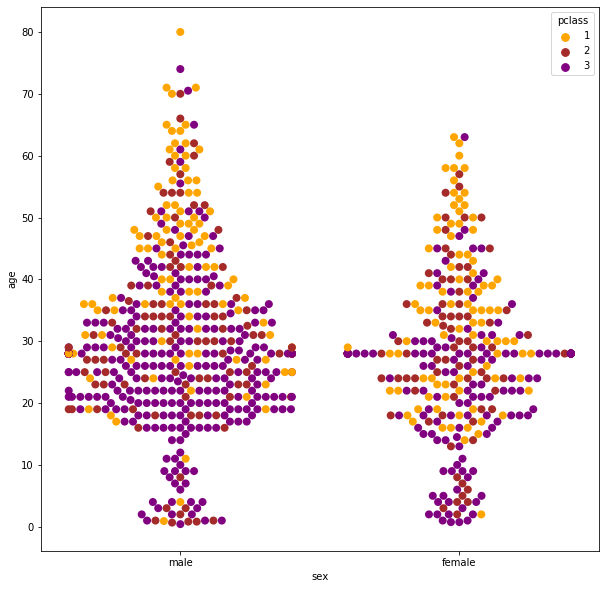

In [335]:
#Clear representation of Ages of passengers and to which Class they belonged
plt.figure(figsize=(10,10))
sns.swarmplot(x="sex",y="age",hue='pclass',data=df,size=8 ,palette=['orange','brown','purple'])
#The above graph makes it clear that most of the people were aged between 20-50



In [336]:
print('Oldest Passenger was of:',df['age'].max(),'Years')
print('Youngest Passenger was of:',df['age'].min(),'Years')
print('Average Age on the ship:',df['age'].mean(),'Years')



Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.36158249158249 Years


In [337]:
#highest fare is 512.3292 dollar
df.sort_values('fare', ascending=False).head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,1,First,woman,False,1,1,yes,True
737,1,1,male,35.0,0,0,512.3292,1,First,man,True,1,1,yes,True
679,1,1,male,36.0,0,1,512.3292,1,First,man,True,1,1,yes,False
88,1,1,female,23.0,3,2,263.0000,1,First,woman,False,1,1,yes,False
27,0,1,male,19.0,3,2,263.0000,0,First,man,True,0,0,no,False


In [338]:
print('Highest Fare was:',df['fare'].max())
print('Lowest Fare was:',df['fare'].min())
print('Average Fare was:',df['fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


In [339]:
#copy of titanic dataset
df1=df.copy()
df1.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
dtype: object

In [340]:
#now use label encoder to convert categorical data into numerical form
le=LabelEncoder()

In [341]:
for i in range(0,df1.shape[1]):
    if df1.dtypes[i]=='object'or df1.dtypes[i]=='bool':
        df1[df1.columns[i]]=le.fit_transform(df1[df1.columns[i]])

In [342]:
df1
#df1['alive']=le.fit_transform(df['alive'])
#df1['embark_town']=le.fit_transform(df['embark_town'])
#df1['deck']=le.fit_transform(df['deck'])
#df1['adult_male']=le.fit_transform(df['adult_male'])
#df1['who']=le.fit_transform(df['who'])
df1['class']=le.fit_transform(df['class'])
#df1['embarked']=le.fit_transform(df['embarked'])
#df1['sex']=le.fit_transform(df['sex'])

In [343]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,0,2,1,1,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,2,0,1,1,1,0
2,1,3,0,26.0,0,0,7.9250,1,2,2,0,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,0,2,0,1,1,1,0
4,0,3,1,35.0,0,0,8.0500,0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1,1,1,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,2,0,1,1,1,1
888,0,3,0,28.0,1,2,23.4500,0,2,2,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,1,0,1,1,1,1,1,1


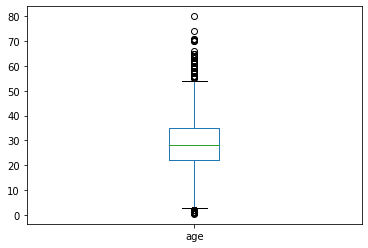

In [344]:
#checking outlier using boxplot
df1['age'].plot.box()

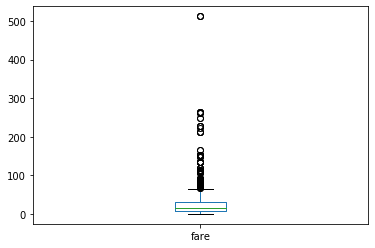

In [345]:
df1['fare'].plot.box()

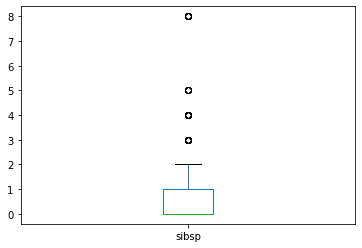

In [346]:
df1['sibsp'].plot.box()

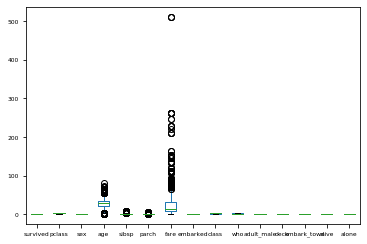

In [347]:
#outlier present in four columns----age,fare,sibsp,parch
#df1.plot(kind='box',subplots=True,layout=(5,3))
df1.plot(kind='box', layout=(8,28), sharey=False, fontsize=6)


In [348]:
z_score=np.abs(zscore(df1))
df1.shape

(891, 15)

In [349]:
#outlier removed from the dataset
threshold=3
df1_new=df1[(z_score<3).all(axis=1)]
df1_new.shape

(820, 15)

In [350]:
df1_new.corr()        #checking correlation between the columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.322306,-0.554888,-0.086026,0.094459,0.201071,0.330439,1.000000,-0.322306,0.316165,-0.597468,1.000000,1.000000,1.000000,-0.247186
pclass,-0.322306,1.000000,0.138041,-0.336981,-0.052312,-0.078366,-0.691720,-0.322306,1.000000,-0.180509,0.128668,-0.322306,-0.322306,-0.322306,0.184553
sex,-0.554888,0.138041,1.000000,0.091656,-0.199204,-0.251872,-0.244614,-0.554888,0.138041,-0.652988,0.935793,-0.554888,-0.554888,-0.554888,0.307978
age,-0.086026,-0.336981,0.091656,1.000000,-0.143912,-0.251772,0.159810,-0.086026,-0.336981,0.323086,0.217084,-0.086026,-0.086026,-0.086026,0.133671
sibsp,0.094459,-0.052312,-0.199204,-0.143912,1.000000,0.307210,0.247216,0.094459,-0.052312,-0.043191,-0.261793,0.094459,0.094459,0.094459,-0.749622
parch,0.201071,-0.078366,-0.251872,-0.251772,0.307210,1.000000,0.259903,0.201071,-0.078366,-0.119046,-0.361544,0.201071,0.201071,0.201071,-0.600250
fare,0.330439,-0.691720,-0.244614,0.159810,0.247216,0.259903,1.000000,0.330439,-0.691720,0.188391,-0.254631,0.330439,0.330439,0.330439,-0.375879
embarked,1.000000,-0.322306,-0.554888,-0.086026,0.094459,0.201071,0.330439,1.000000,-0.322306,0.316165,-0.597468,1.000000,1.000000,1.000000,-0.247186
class,-0.322306,1.000000,0.138041,-0.336981,-0.052312,-0.078366,-0.691720,-0.322306,1.000000,-0.180509,0.128668,-0.322306,-0.322306,-0.322306,0.184553
who,0.316165,-0.180509,-0.652988,0.323086,-0.043191,-0.119046,0.188391,0.316165,-0.180509,1.000000,-0.505437,0.316165,0.316165,0.316165,-0.023657


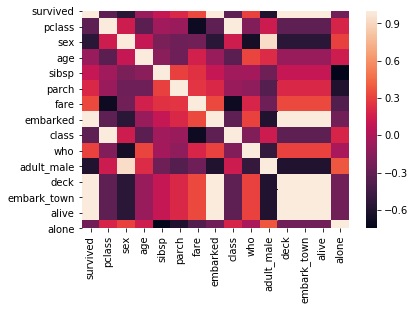

In [351]:
#graphical representation of correlation
sns.heatmap(df1_new.corr())

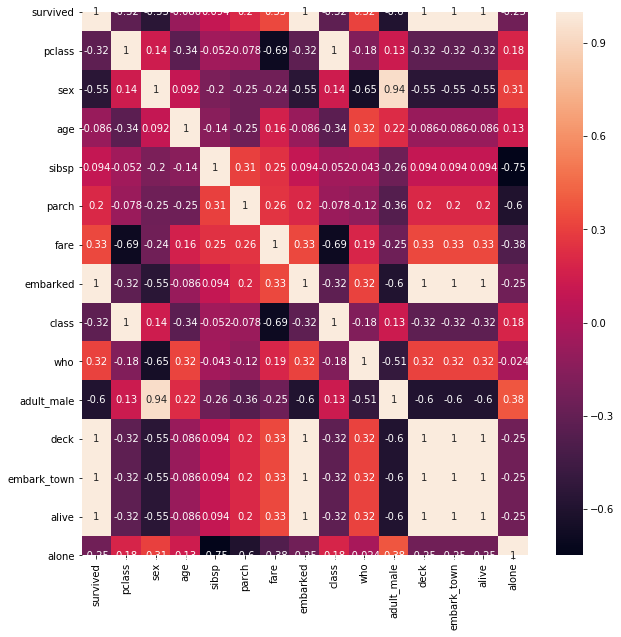

In [352]:
plt.figure(figsize=(10,10))
sns.heatmap(df1_new.corr(),annot=True)
plt.show()                              # dark color show data highly correlated

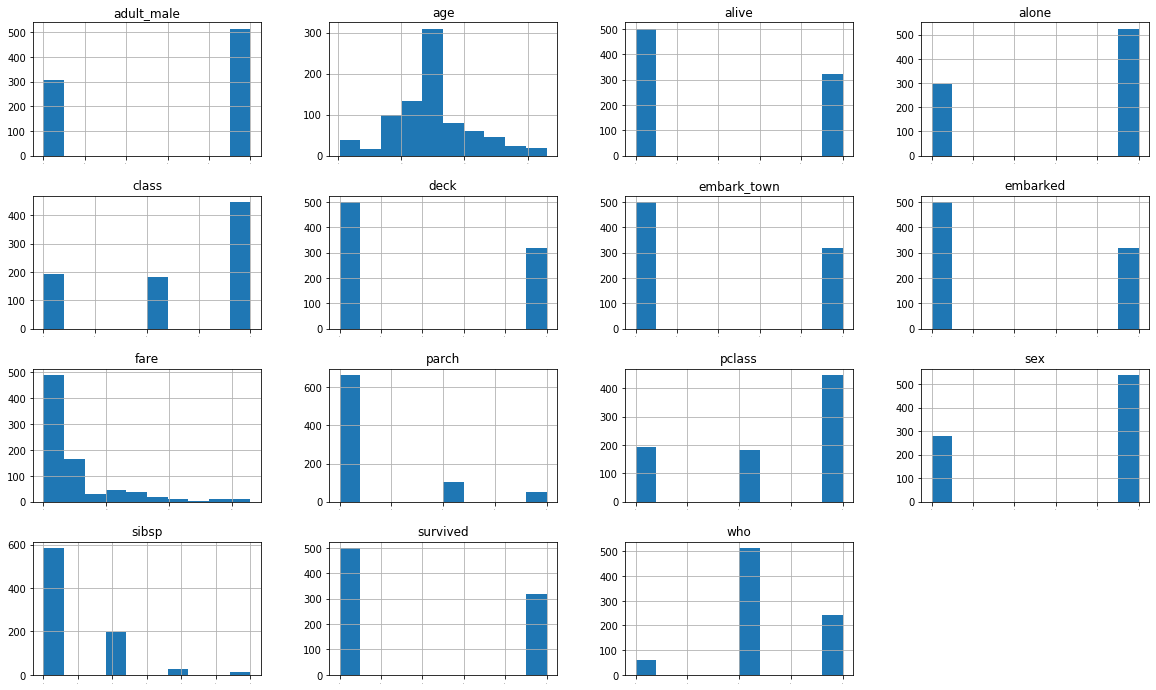

In [353]:
#histogram of titanic dataset of each columns

df1_new.hist(xlabelsize = 0, figsize=(20,12))
plt.show()
#skewness present fare and parch column

In [354]:
df1_new.skew()

survived       0.450825
pclass        -0.632242
sex           -0.664152
age            0.401952
sibsp          1.979577
parch          2.122629
fare           2.318761
embarked       0.450825
class         -0.632242
who           -0.025315
adult_male    -0.525432
deck           0.450825
embark_town    0.450825
alive          0.450825
alone         -0.579988
dtype: float64

In [355]:
#skewness removed from the dataset
import numpy as np
for col in df1_new.columns:
    if df1_new.skew().loc[col]>0.55:
        df1_new[col]=np.log1p(df1_new[col])

In [356]:
df1_new.skew()

survived       0.450825
pclass        -0.632242
sex           -0.664152
age            0.401952
sibsp          1.292829
parch          1.832391
fare           0.196364
embarked       0.450825
class         -0.632242
who           -0.025315
adult_male    -0.525432
deck           0.450825
embark_town    0.450825
alive          0.450825
alone         -0.579988
dtype: float64

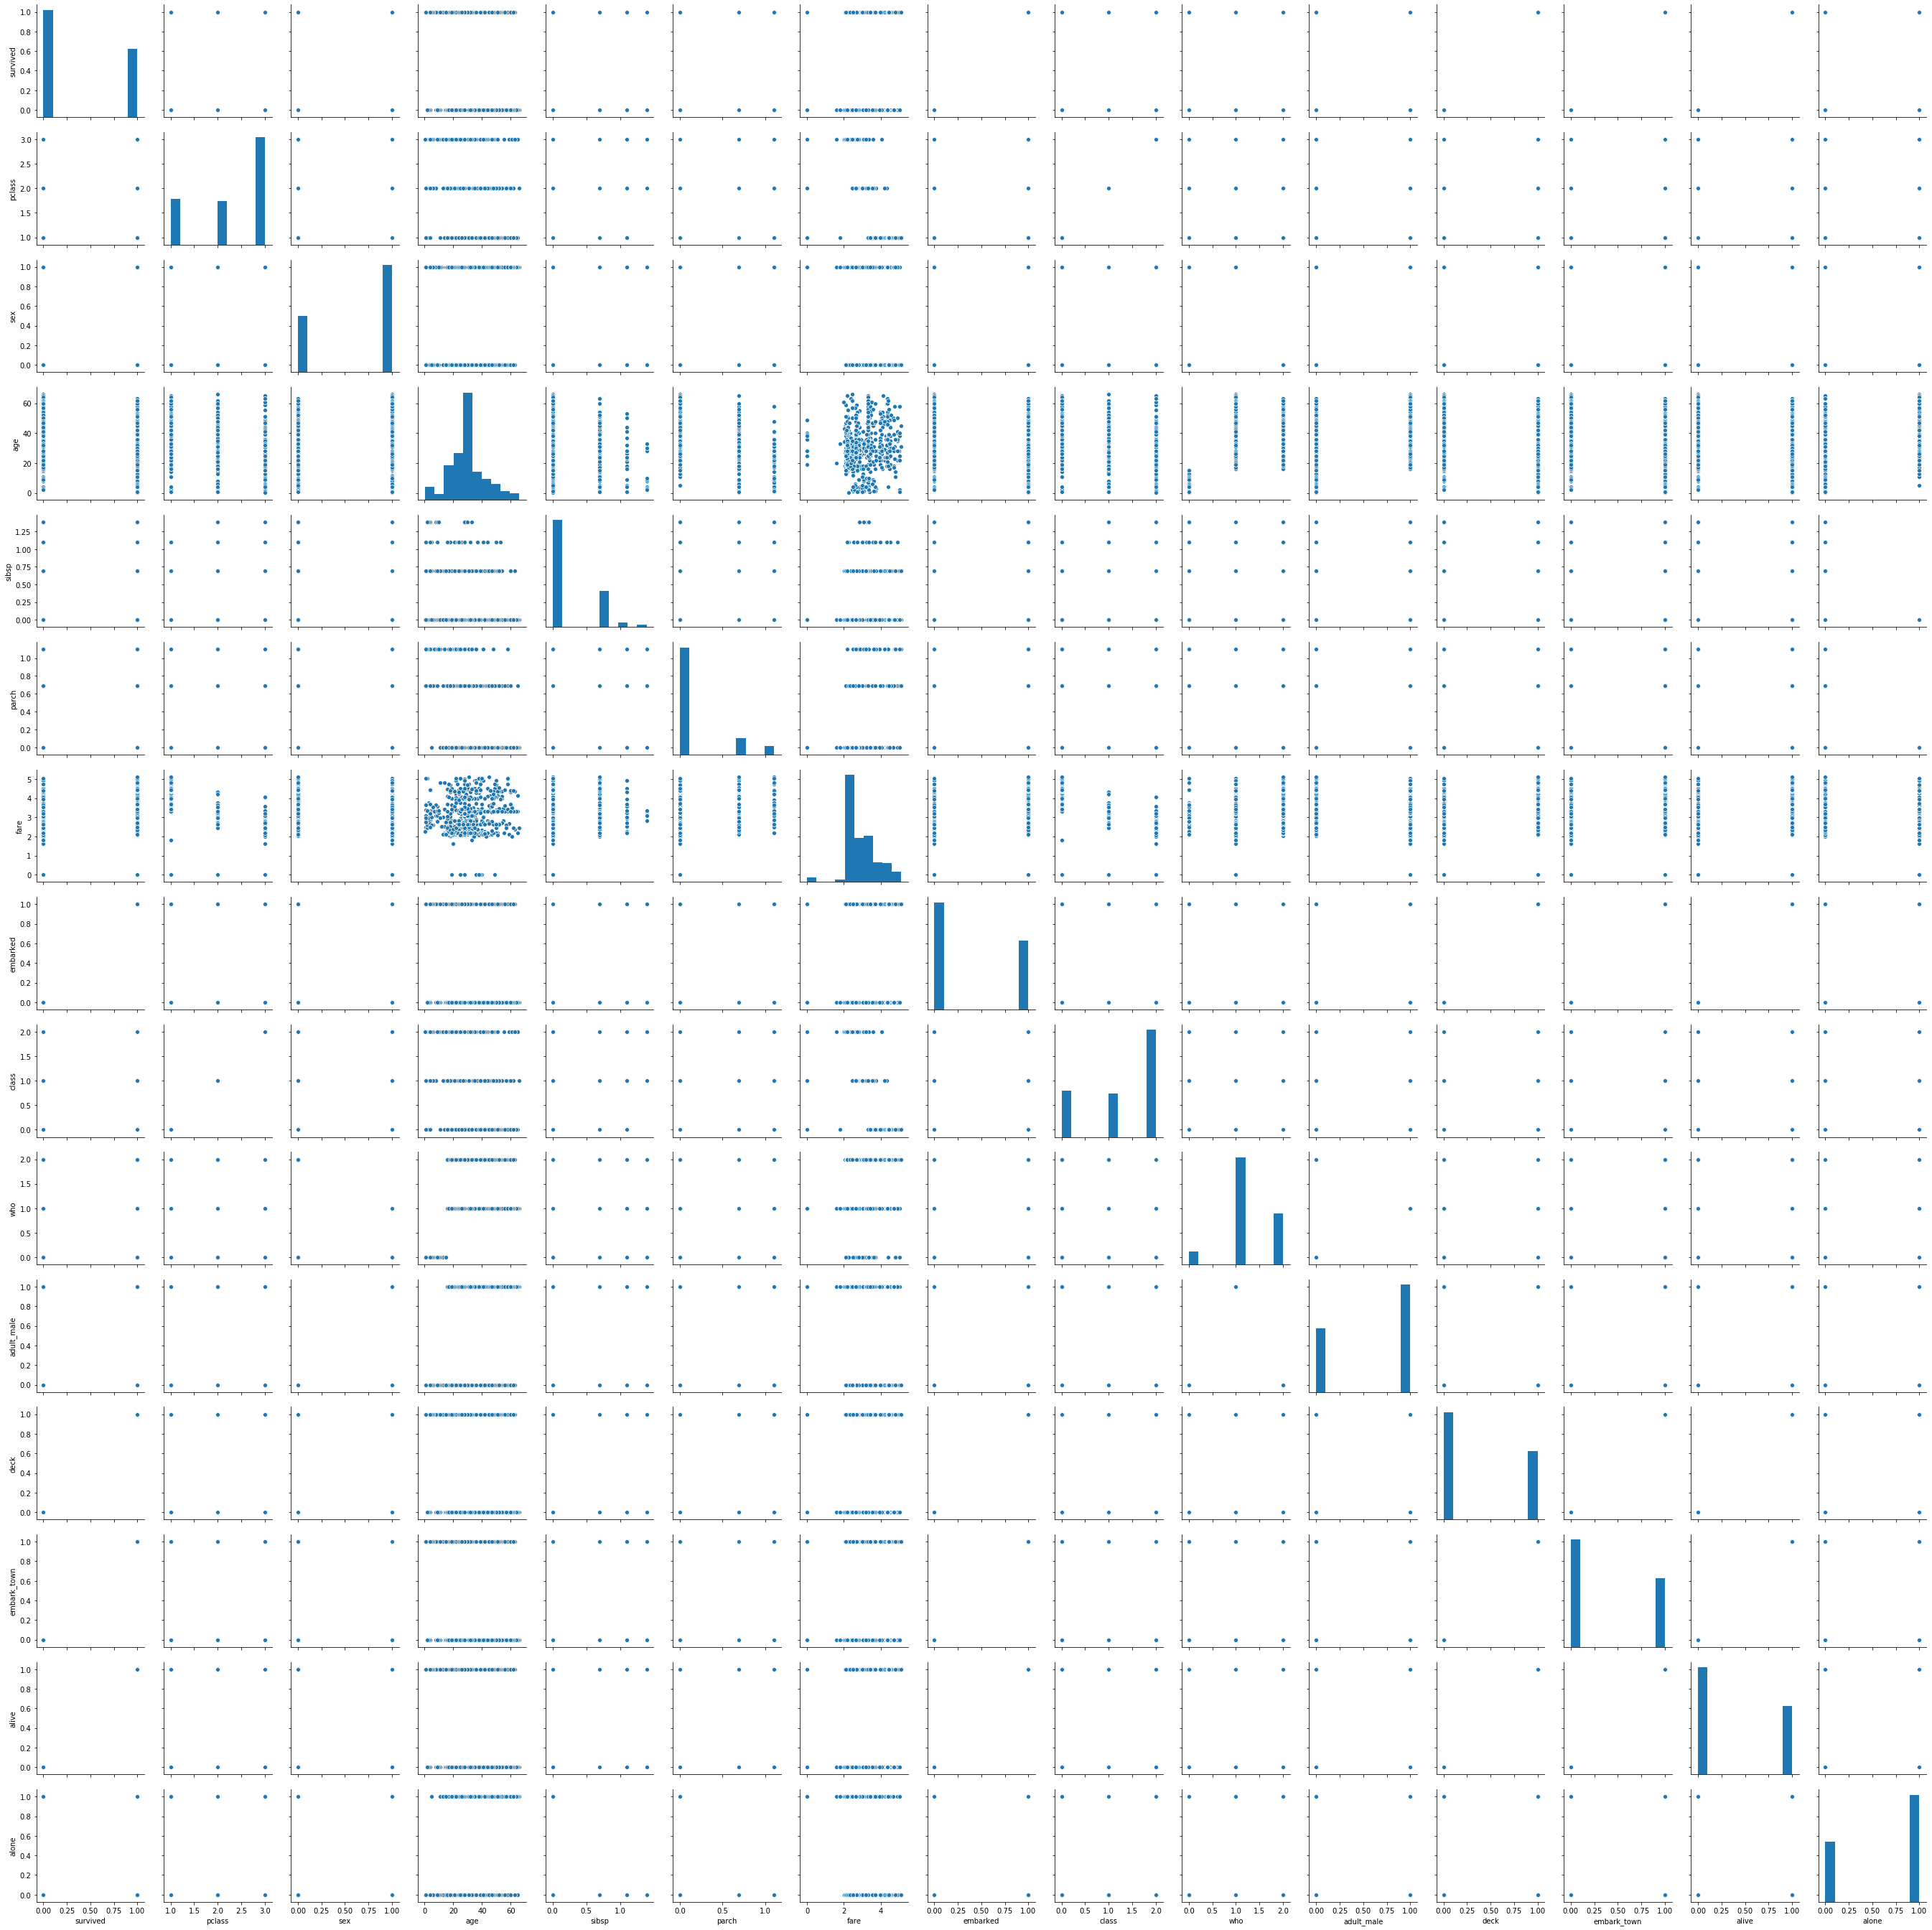

In [357]:
sns.pairplot(df1_new)

In [358]:
df1_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,0.693147,0.000000,2.110213,0,2,1,1,0,0,0,0
1,1,1,0,38.0,0.693147,0.000000,4.280593,1,0,2,0,1,1,1,0
2,1,3,0,26.0,0.000000,0.000000,2.188856,1,2,2,0,1,1,1,1
3,1,1,0,35.0,0.693147,0.000000,3.990834,1,0,2,0,1,1,1,0
4,0,3,1,35.0,0.000000,0.000000,2.202765,0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.000000,0.000000,2.639057,0,1,1,1,0,0,0,1
887,1,1,0,19.0,0.000000,0.000000,3.433987,1,0,2,0,1,1,1,1
888,0,3,0,28.0,0.693147,1.098612,3.196630,0,2,2,0,0,0,0,0
889,1,1,1,26.0,0.000000,0.000000,3.433987,1,0,1,1,1,1,1,1


In [359]:
#selection of input and output variable
df2=pd.DataFrame(df1_new)
x =df2.iloc[:,1:5].values
x

array([[ 3.        ,  1.        , 22.        ,  0.69314718],
       [ 1.        ,  0.        , 38.        ,  0.69314718],
       [ 3.        ,  0.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 28.        ,  0.69314718],
       [ 1.        ,  1.        , 26.        ,  0.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ]])

In [360]:
x.shape

(820, 4)

In [361]:
y=df2.iloc[:,0].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [362]:
y.shape

(820,)

In [363]:
y=y.reshape(-1,1)
y.shape

(820, 1)

In [364]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x


array([[ 0.8339949 ,  0.72203588, -0.61192649,  1.28993603],
       [-1.58680446, -1.38497273,  0.70321021,  1.28993603],
       [ 0.8339949 , -1.38497273, -0.28314231, -0.60779129],
       ...,
       [ 0.8339949 , -1.38497273, -0.11875023,  1.28993603],
       [-1.58680446,  0.72203588, -0.28314231, -0.60779129],
       [ 0.8339949 ,  0.72203588,  0.21003395, -0.60779129]])

In [365]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)


In [366]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)


83.54


In [367]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8658536585365854
[[93  9]
 [13 49]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       102
           1       0.84      0.79      0.82        62

    accuracy                           0.87       164
   macro avg       0.86      0.85      0.86       164
weighted avg       0.87      0.87      0.86       164



In [368]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)


81.1


In [369]:
#apply model using for loop and find which state it performs well
for r_state in range(42,101):
        max=r_state
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]
        for m in model:
            m.fit(x_train,y_train)
            m.score(x_train,y_train)
            predm=m.predict(x_test)
            print(accuracy_score(y_test,predm))
            print(confusion_matrix(y_test,predm))
            print(classification_report(y_test,predm))
        max=max+1
        print("\n*************************************",max)
#SVC model is best at random state 43 with accuracy 86.5%

0.8109756097560976
[[89 15]
 [16 44]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       104
           1       0.75      0.73      0.74        60

    accuracy                           0.81       164
   macro avg       0.80      0.79      0.80       164
weighted avg       0.81      0.81      0.81       164

0.7926829268292683
[[87 17]
 [17 43]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       104
           1       0.72      0.72      0.72        60

    accuracy                           0.79       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.79      0.79      0.79       164

0.823170731707317
[[96  8]
 [21 39]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       104
           1       0.83      0.65      0.73        60

    accuracy                           0.82       164
   macro avg   

In [370]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7987804878048781
[[80 15]
 [18 51]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.77      0.74      0.76        69

    accuracy                           0.80       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.80      0.80      0.80       164



In [371]:
from sklearn.model_selection import cross_val_score  #cross validation is used to overcome the problem of overfitting 
                                                    #and underfitting
                                                     
svc=cross_val_score(SVC(kernel='rbf'),x,y,cv=5,scoring='accuracy')
print(svc)
print(svc.mean(),svc.std())                      #there is no underfitting and overfitting problem

[0.80487805 0.79878049 0.7804878  0.79878049 0.83536585]
0.8036585365853659 0.017839925412594847


In [372]:
# now use the gradient boosting technique to enhance the performance of model
# for getting best set parameters we will use grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gsc=GridSearchCV(gbr,parameters,cv=5)
gsc.fit(x_train,y_train)
gsc.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [373]:
gbr=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
svc=cross_val_score(gbr,x,y,cv=5,scoring='accuracy')
print(svc)
print(svc.mean(),svc.std())                      

[0.80487805 0.82317073 0.80487805 0.81097561 0.84146341]
0.8170731707317073 0.0139045783548675


In [374]:
#now check adaboost classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_cls=AdaBoostClassifier()        
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gsc=GridSearchCV(ada_cls,parameters,cv=5)
gsc.fit(x_train,y_train)
gsc.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [375]:
ada_cls=AdaBoostClassifier(learning_rate=1,n_estimators=10)

svc=cross_val_score(ada_cls,x,y,cv=5,scoring='accuracy')
print(svc)
print(svc.mean(),svc.std())                      

[0.78658537 0.79878049 0.80487805 0.79878049 0.81707317]
0.8012195121951221 0.009907363908092607


In [376]:
#finalise the model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)
SVC_final=SVC()
print(SVC_final.fit(x_train,y_train))

SVC_final.predict(x_test)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [377]:
from sklearn.externals import joblib
#save file as pickle
joblib.dump(SVC(),'P4_titanic.pkl')

['P4_titanic.pkl']